# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Importing the Train Dataset

In [2]:
fin_risk_train = pd.read_csv('Financial_Risk_Participants_Data_Train.csv')

In [3]:
fin_risk_train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


# Data Wrangling

In [4]:
fin_risk_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
City                    543 non-null int64
Location_Score          543 non-null float64
Internal_Audit_Score    543 non-null int64
External_Audit_Score    543 non-null int64
Fin_Score               543 non-null int64
Loss_score              543 non-null int64
Past_Results            543 non-null int64
IsUnderRisk             543 non-null int64
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [5]:
fin_risk_train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [6]:
fin_risk_train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [7]:
fin_risk_train.shape

(543, 8)

In [8]:
fin_risk_train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

In [9]:
fin_risk_train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


## Correlation HeatMap

In [10]:
fin_risk_train_corr = fin_risk_train.corr()
fin_risk_train_corr

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
City,1.000000,0.012551,-0.024306,-0.049994,-0.051779,0.033183,0.004762,-0.087463
Location_Score,0.012551,1.000000,-0.358629,-0.205775,-0.264536,-0.042139,-0.074364,-0.423956
Internal_Audit_Score,-0.024306,-0.358629,1.000000,0.453839,0.365133,0.007685,0.112093,0.586097
External_Audit_Score,-0.049994,-0.205775,0.453839,1.000000,0.433374,-0.038786,0.141163,0.435619
Fin_Score,-0.051779,-0.264536,0.365133,0.433374,1.000000,-0.078573,0.138111,0.362463
Loss_score,0.033183,-0.042139,0.007685,-0.038786,-0.078573,1.000000,0.081858,0.044888
Past_Results,0.004762,-0.074364,0.112093,0.141163,0.138111,0.081858,1.000000,0.102120
IsUnderRisk,-0.087463,-0.423956,0.586097,0.435619,0.362463,0.044888,0.102120,1.000000


(8.0, 0.0)

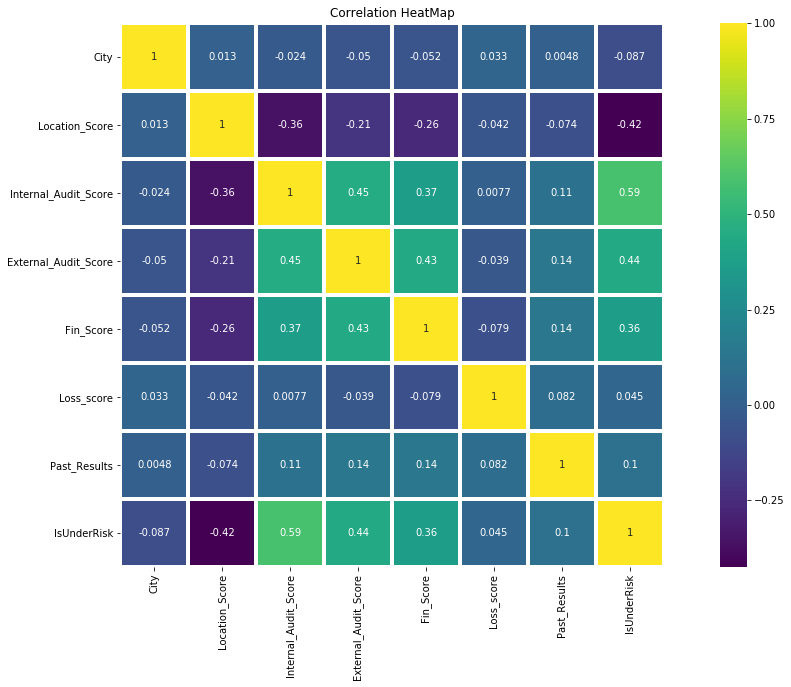

In [11]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(fin_risk_train_corr,annot=True, cmap='viridis', linecolor ='white', square=1, linewidths=3)
plt.title('Correlation HeatMap')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
X = fin_risk_train.iloc[:, :-1].values
y = fin_risk_train.iloc[:, -1].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (543, 7)
Shape of y: (543,)


# Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [14]:
X_train

array([[42.   , 17.919,  3.   , ...,  4.   ,  8.   ,  0.   ],
       [ 8.   , 22.09 , 12.   , ...,  7.   ,  5.   ,  1.   ],
       [31.   , 77.73 ,  8.   , ...,  3.   ,  8.   ,  1.   ],
       ...,
       [31.   , 14.672, 11.   , ..., 11.   ,  5.   ,  0.   ],
       [28.   , 17.085, 12.   , ...,  3.   ,  6.   ,  1.   ],
       [40.   , 15.71 ,  3.   , ...,  6.   ,  5.   ,  0.   ]])

# Feature Scaling of the Train Dataset

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing the Test Dataset

In [16]:
fin_risk_test = pd.read_csv('Financial_Risk_Participants_Data_Test.csv')

In [17]:
X_test_new = fin_risk_test.iloc[:, :].values

In [18]:
X_test_new.shape

(233, 7)

# Feature Scaling of the Test Dataset

In [19]:
X_test_new = sc.transform(X_test_new)

In [20]:
X_test_new

array([[ 1.44076297, -0.53937096,  1.43476947, ...,  0.60011355,
         0.80493643, -0.79240582],
       [-0.19558935,  1.35322535, -0.6925266 , ..., -0.03981097,
        -0.80741316,  0.44022545],
       [ 0.7589495 ,  1.5196365 , -1.60422492, ..., -0.03981097,
         1.3423863 , -0.79240582],
       ...,
       [-1.1501282 , -1.00618453, -0.38862716, ..., -0.99969776,
        -0.2699633 ,  0.44022545],
       [-1.1501282 , -0.90851815,  1.43476947, ...,  0.92007581,
         0.80493643,  0.44022545],
       [ 1.44076297,  1.46638981, -0.6925266 , ..., -1.31966002,
         0.26748657,  0.44022545]])

# IMPLEMENTATION OF DIFFERENT CLASSIFIER MODELS

## 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier_logis = LogisticRegression(random_state = 0, solver='lbfgs')
classifier_logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_logis = classifier_logis.predict(X_test)
print(np.concatenate((y_pred_logis.reshape(len(y_pred_logis),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [23]:
y_prob_logis = classifier_logis.predict_proba(X_test)
print(y_prob_logis)

[[2.03560672e-01 7.96439328e-01]
 [6.47784462e-01 3.52215538e-01]
 [8.96099921e-01 1.03900079e-01]
 [5.40979506e-01 4.59020494e-01]
 [7.14087963e-01 2.85912037e-01]
 [2.43194446e-01 7.56805554e-01]
 [1.33261919e-02 9.86673808e-01]
 [1.95618618e-01 8.04381382e-01]
 [2.27882027e-01 7.72117973e-01]
 [7.93174605e-01 2.06825395e-01]
 [8.69041979e-01 1.30958021e-01]
 [9.48237721e-01 5.17622785e-02]
 [1.29914026e-01 8.70085974e-01]
 [8.98853822e-01 1.01146178e-01]
 [7.59082163e-01 2.40917837e-01]
 [4.24649593e-01 5.75350407e-01]
 [4.26482143e-01 5.73517857e-01]
 [5.20598117e-01 4.79401883e-01]
 [1.86223016e-03 9.98137770e-01]
 [9.03881137e-01 9.61188629e-02]
 [3.25103479e-02 9.67489652e-01]
 [1.35839108e-01 8.64160892e-01]
 [1.95089510e-03 9.98049105e-01]
 [1.69138857e-01 8.30861143e-01]
 [8.47116944e-01 1.52883056e-01]
 [9.10754538e-01 8.92454624e-02]
 [6.91555466e-01 3.08444534e-01]
 [1.17608937e-01 8.82391063e-01]
 [8.04166580e-02 9.19583342e-01]
 [3.82403100e-01 6.17596900e-01]
 [7.589506

In [24]:
conf_matrix_logis = confusion_matrix(y_test, y_pred_logis)
print(conf_matrix_logis)
accuracy_score(y_test, y_pred_logis)

[[37  8]
 [ 9 55]]


0.8440366972477065

In [25]:
scores_logis = cross_val_score(classifier_logis, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_logis))
print("Mean accuracy: {:.2f}" . format(scores_logis.mean()))
print("Standard Deviation: {:.2f}" . format(scores_logis.std()))

Cross-validation scores: [0.78899083 0.81651376 0.85321101 0.86111111 0.74074074]
Mean accuracy: 0.81
Standard Deviation: 0.04


## 2. SVM

In [26]:
param_grid = [{'kernel' : ['linear' ],
 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [27]:
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search. fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'C': 0.01, 'kernel': 'linear'}
Best cross-validation score: 0.82


In [28]:
classifier_svm = SVC(C=0.01, kernel = 'linear', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred_svm = classifier_svm.predict(X_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [30]:
y_prob_svm = classifier_svm.predict_proba(X_test)
print(y_prob_svm)

[[1.95072200e-01 8.04927800e-01]
 [7.21154200e-01 2.78845800e-01]
 [8.85020306e-01 1.14979694e-01]
 [6.61776054e-01 3.38223946e-01]
 [5.48777269e-01 4.51222731e-01]
 [2.40861285e-01 7.59138715e-01]
 [7.07780371e-02 9.29221963e-01]
 [1.47153803e-01 8.52846197e-01]
 [1.96925876e-01 8.03074124e-01]
 [8.09392104e-01 1.90607896e-01]
 [8.89127282e-01 1.10872718e-01]
 [9.38498101e-01 6.15018991e-02]
 [2.56427823e-01 7.43572177e-01]
 [9.05803325e-01 9.41966753e-02]
 [5.62942689e-01 4.37057311e-01]
 [3.48319105e-01 6.51680895e-01]
 [3.01661706e-01 6.98338294e-01]
 [4.48987659e-01 5.51012341e-01]
 [5.56392866e-03 9.94436071e-01]
 [9.02516445e-01 9.74835549e-02]
 [6.13458570e-02 9.38654143e-01]
 [1.78907124e-01 8.21092876e-01]
 [6.34857356e-03 9.93651426e-01]
 [1.64700466e-01 8.35299534e-01]
 [8.51170319e-01 1.48829681e-01]
 [8.97304249e-01 1.02695751e-01]
 [7.84847843e-01 2.15152157e-01]
 [1.54832018e-01 8.45167982e-01]
 [1.14743325e-01 8.85256675e-01]
 [5.00000000e-01 5.00000000e-01]
 [6.474299

In [31]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)
accuracy_score(y_test, y_pred_svm)

[[33 12]
 [ 9 55]]


0.8073394495412844

In [32]:
scores_svm = cross_val_score(classifier_svm, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_svm))
print("Mean accuracy: {:.2f}" . format(scores_svm.mean()))
print("Standard Deviation: {:.2f}" . format(scores_svm.std()))

Cross-validation scores: [0.79816514 0.85321101 0.8440367  0.85185185 0.76851852]
Mean accuracy: 0.82
Standard Deviation: 0.03


## 3. Kernel SVM

In [33]:
param_grid = [{'kernel' : ['rbf' ],
 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [34]:
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search. fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.84


In [35]:
classifier_ksvm = SVC(C=100, kernel = 'rbf', gamma=0.001, random_state = 0, probability=True)
classifier_ksvm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred_ksvm = classifier_ksvm.predict(X_test)
print(np.concatenate((y_pred_ksvm.reshape(len(y_pred_ksvm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [37]:
y_prob_ksvm = classifier_ksvm.predict_proba(X_test)
print(y_prob_ksvm)

[[2.01990157e-01 7.98009843e-01]
 [6.72565895e-01 3.27434105e-01]
 [8.93461666e-01 1.06538334e-01]
 [5.69008824e-01 4.30991176e-01]
 [6.70942565e-01 3.29057435e-01]
 [2.58140966e-01 7.41859034e-01]
 [1.67133041e-02 9.83286696e-01]
 [1.85885363e-01 8.14114637e-01]
 [1.99060054e-01 8.00939946e-01]
 [7.74463866e-01 2.25536134e-01]
 [8.68353898e-01 1.31646102e-01]
 [9.39626017e-01 6.03739829e-02]
 [1.55199286e-01 8.44800714e-01]
 [8.96351836e-01 1.03648164e-01]
 [7.59895279e-01 2.40104721e-01]
 [4.62149086e-01 5.37850914e-01]
 [4.31139746e-01 5.68860254e-01]
 [5.60041065e-01 4.39958935e-01]
 [1.76687007e-05 9.99982331e-01]
 [8.84662969e-01 1.15337031e-01]
 [3.35721515e-02 9.66427849e-01]
 [1.70682030e-01 8.29317970e-01]
 [3.02016407e-03 9.96979836e-01]
 [1.53847819e-01 8.46152181e-01]
 [8.28189858e-01 1.71810142e-01]
 [9.05198518e-01 9.48014824e-02]
 [6.63307671e-01 3.36692329e-01]
 [1.18524499e-01 8.81475501e-01]
 [9.89691736e-02 9.01030826e-01]
 [3.94229586e-01 6.05770414e-01]
 [7.854907

In [38]:
conf_matrix_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(conf_matrix_ksvm)
accuracy_score(y_test, y_pred_ksvm)

[[39  6]
 [ 9 55]]


0.8623853211009175

In [39]:
scores_ksvm = cross_val_score(classifier_ksvm, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_ksvm))
print("Mean accuracy: {:.2f}" . format(scores_ksvm.mean()))
print("Standard Deviation: {:.2f}" . format(scores_ksvm.std()))

Cross-validation scores: [0.79816514 0.85321101 0.89908257 0.86111111 0.76851852]
Mean accuracy: 0.84
Standard Deviation: 0.05


## 4. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred_nb = classifier_nb.predict(X_test)
print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [42]:
y_prob_nb = classifier_nb.predict_proba(X_test)
print(y_prob_nb)

[[3.70107951e-02 9.62989205e-01]
 [9.09303877e-01 9.06961231e-02]
 [9.88936022e-01 1.10639778e-02]
 [9.21806834e-01 7.81931663e-02]
 [9.37772836e-01 6.22271640e-02]
 [1.26316906e-01 8.73683094e-01]
 [2.91874232e-06 9.99997081e-01]
 [2.62907846e-05 9.99973709e-01]
 [2.34100041e-01 7.65899959e-01]
 [9.83930384e-01 1.60696157e-02]
 [9.69957831e-01 3.00421693e-02]
 [9.93984321e-01 6.01567879e-03]
 [9.46632411e-04 9.99053368e-01]
 [9.94864668e-01 5.13533213e-03]
 [7.43061836e-01 2.56938164e-01]
 [7.42241159e-01 2.57758841e-01]
 [7.78829163e-01 2.21170837e-01]
 [9.06317465e-01 9.36825355e-02]
 [3.08812170e-11 1.00000000e+00]
 [9.81093916e-01 1.89060841e-02]
 [8.35656991e-06 9.99991643e-01]
 [2.31340265e-01 7.68659735e-01]
 [7.11799373e-12 1.00000000e+00]
 [3.28543348e-01 6.71456652e-01]
 [9.89056602e-01 1.09433980e-02]
 [9.94055949e-01 5.94405086e-03]
 [9.77721268e-01 2.22787324e-02]
 [5.82498045e-03 9.94175020e-01]
 [7.11294281e-03 9.92887057e-01]
 [6.86753188e-01 3.13246812e-01]
 [1.401310

In [43]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)
accuracy_score(y_test, y_pred_nb)

[[44  1]
 [13 51]]


0.8715596330275229

In [44]:
scores_nb = cross_val_score(classifier_nb, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_nb))
print("Mean accuracy: {:.2f}" . format(scores_nb.mean()))
print("Standard Deviation: {:.2f}" . format(scores_nb.std()))

Cross-validation scores: [0.88990826 0.8440367  0.89908257 0.81481481 0.78703704]
Mean accuracy: 0.85
Standard Deviation: 0.04


## 5. Decision Tree

In [45]:
param_grid = [{'max_depth':range(1,20), 'criterion':['gini','entropy'], 'min_samples_leaf':range(5,15)}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'max_depth': range(1, 20), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(5, 15)}]


In [46]:
from sklearn.tree import DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6}
Best cross-validation score: 0.85


In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 7, random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [48]:
y_pred_DT = classifier_DT.predict(X_test)
print(np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [49]:
y_prob_DT = classifier_DT.predict_proba(X_test)
print(y_prob_DT)

[[0.         1.        ]
 [0.85714286 0.14285714]
 [0.42857143 0.57142857]
 [0.42857143 0.57142857]
 [0.6        0.4       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.36111111 0.63888889]
 [0.85185185 0.14814815]
 [0.77777778 0.22222222]
 [0.76470588 0.23529412]
 [0.42857143 0.57142857]
 [0.42857143 0.57142857]
 [0.58333333 0.41666667]
 [1.         0.        ]
 [0.875      0.125     ]
 [0.5        0.5       ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.36111111 0.63888889]
 [1.         0.        ]
 [1.         0.        ]
 [0.85185185 0.14814815]
 [0.         1.        ]
 [0.         1.        ]
 [0.85714286 0.14285714]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.77777778 0.22222222]
 [0.         1.        ]
 [0.76470588 0.23529412]
 [0.36111111 0.63888889]
 [1.         0.        ]
 [0.85714286 0.14285714]
 [1.         0.        ]


In [50]:
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(conf_matrix_DT)
accuracy_score(y_test, y_pred_DT)

[[39  6]
 [ 8 56]]


0.8715596330275229

In [51]:
scores_DT = cross_val_score(classifier_DT, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_DT))
print("Mean accuracy: {:.2f}" . format(scores_DT.mean()))
print("Standard Deviation: {:.2f}" . format(scores_DT.std()))

Cross-validation scores: [0.82568807 0.88990826 0.89908257 0.86111111 0.80555556]
Mean accuracy: 0.86
Standard Deviation: 0.04


## 6. Bagging

In [52]:
from sklearn.ensemble import BaggingClassifier
classifier_bag = BaggingClassifier(base_estimator=classifier_DT, n_estimators=100, random_state=100)
classifier_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=7,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [53]:
y_pred_bag = classifier_bag.predict(X_test)
print(np.concatenate((y_pred_bag.reshape(len(y_pred_bag),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [54]:
y_prob_bag = classifier_bag.predict_proba(X_test)
print(y_prob_bag)

[[0.         1.        ]
 [0.65591324 0.34408676]
 [0.7654386  0.2345614 ]
 [0.74127061 0.25872939]
 [0.62970628 0.37029372]
 [0.         1.        ]
 [0.         1.        ]
 [0.16932519 0.83067481]
 [0.39753088 0.60246912]
 [0.79971647 0.20028353]
 [0.87654447 0.12345553]
 [0.82160136 0.17839864]
 [0.43831223 0.56168777]
 [0.75880596 0.24119404]
 [0.65124271 0.34875729]
 [0.67630435 0.32369565]
 [0.56204124 0.43795876]
 [0.45005237 0.54994763]
 [0.         1.        ]
 [0.85729867 0.14270133]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.27502291 0.72497709]
 [0.92931258 0.07068742]
 [0.93469219 0.06530781]
 [0.76366287 0.23633713]
 [0.         1.        ]
 [0.         1.        ]
 [0.6653242  0.3346758 ]
 [0.12062096 0.87937904]
 [0.         1.        ]
 [0.89145094 0.10854906]
 [0.78775953 0.21224047]
 [0.         1.        ]
 [0.81009137 0.18990863]
 [0.38759455 0.61240545]
 [0.6814895  0.3185105 ]
 [0.54756838 0.45243162]
 [0.60197153 0.39802847]


In [55]:
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
print(conf_matrix_bag)
accuracy_score(y_test, y_pred_bag)

[[42  3]
 [ 7 57]]


0.908256880733945

In [56]:
scores_bag = cross_val_score(classifier_bag, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_bag))
print("Mean accuracy: {:.2f}" . format(scores_bag.mean()))
print("Standard Deviation: {:.2f}" . format(scores_bag.std()))

Cross-validation scores: [0.8440367  0.88073394 0.91743119 0.87037037 0.82407407]
Mean accuracy: 0.87
Standard Deviation: 0.03


## 7. Ada_BOOST

In [57]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(base_estimator=classifier_DT, n_estimators=100, random_state=100)
classifier_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=7,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                             

In [58]:
y_pred_ada = classifier_ada.predict(X_test)
print(np.concatenate((y_pred_ada.reshape(len(y_pred_ada),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [59]:
y_prob_ada = classifier_ada.predict_proba(X_test)
print(y_prob_ada)

[[6.71036023e-03 9.93289640e-01]
 [9.30396035e-01 6.96039651e-02]
 [9.96247571e-01 3.75242879e-03]
 [5.64302033e-02 9.43569797e-01]
 [7.17605830e-01 2.82394170e-01]
 [7.30821927e-03 9.92691781e-01]
 [8.49866106e-06 9.99991501e-01]
 [7.47925302e-01 2.52074698e-01]
 [3.10475508e-01 6.89524492e-01]
 [4.26018760e-01 5.73981240e-01]
 [9.96190908e-01 3.80909190e-03]
 [9.90325908e-01 9.67409243e-03]
 [6.55562796e-01 3.44437204e-01]
 [5.76014716e-01 4.23985284e-01]
 [8.92419601e-01 1.07580399e-01]
 [8.64124775e-01 1.35875225e-01]
 [1.21019763e-01 8.78980237e-01]
 [2.31509915e-02 9.76849009e-01]
 [3.35659629e-06 9.99996643e-01]
 [9.91330471e-01 8.66952861e-03]
 [2.24111103e-05 9.99977589e-01]
 [9.57332628e-03 9.90426674e-01]
 [2.46577351e-05 9.99975342e-01]
 [3.60486146e-03 9.96395139e-01]
 [9.99269884e-01 7.30116160e-04]
 [9.98793210e-01 1.20679014e-03]
 [9.87459507e-01 1.25404928e-02]
 [3.87192483e-05 9.99961281e-01]
 [1.24209808e-04 9.99875790e-01]
 [8.39379476e-01 1.60620524e-01]
 [5.503012

In [60]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_ada)
accuracy_score(y_test, y_pred_ada)

[[36  9]
 [ 9 55]]


0.8348623853211009

In [61]:
scores_ada = cross_val_score(classifier_ada, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_ada))
print("Mean accuracy: {:.2f}" . format(scores_ada.mean()))
print("Standard Deviation: {:.2f}" . format(scores_ada.std()))

Cross-validation scores: [0.79816514 0.83486239 0.91743119 0.83333333 0.78703704]
Mean accuracy: 0.83
Standard Deviation: 0.05


## 8. XG-Boost

In [62]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred_xg = classifier_xg.predict(X_test)
print(np.concatenate((y_pred_xg.reshape(len(y_pred_xg),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [64]:
y_prob_xg = classifier_xg.predict_proba(X_test)
print(y_prob_xg)

[[2.34361887e-02 9.76563811e-01]
 [9.29067671e-01 7.09323063e-02]
 [9.67530847e-01 3.24691832e-02]
 [1.81527734e-02 9.81847227e-01]
 [6.79568291e-01 3.20431709e-01]
 [1.51162148e-02 9.84883785e-01]
 [1.78104639e-03 9.98218954e-01]
 [4.00819957e-01 5.99180043e-01]
 [6.12881184e-02 9.38711882e-01]
 [2.76939631e-01 7.23060369e-01]
 [9.38739955e-01 6.12600185e-02]
 [9.31374192e-01 6.86258376e-02]
 [5.80521822e-01 4.19478148e-01]
 [2.95615315e-01 7.04384685e-01]
 [7.30473936e-01 2.69526064e-01]
 [9.60907400e-01 3.90926003e-02]
 [8.34008873e-01 1.65991127e-01]
 [1.34120584e-02 9.86587942e-01]
 [1.76948309e-03 9.98230517e-01]
 [9.95440185e-01 4.55981959e-03]
 [2.73406506e-04 9.99726593e-01]
 [3.35526466e-03 9.96644735e-01]
 [1.81323290e-03 9.98186767e-01]
 [2.21763849e-02 9.77823615e-01]
 [9.91674423e-01 8.32555164e-03]
 [9.81814504e-01 1.81854852e-02]
 [6.51443243e-01 3.48556787e-01]
 [3.29810381e-03 9.96701896e-01]
 [3.12507153e-03 9.96874928e-01]
 [8.60307336e-01 1.39692664e-01]
 [1.384085

In [65]:
conf_matrix_xg = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_xg)
accuracy_score(y_test, y_pred_xg)

[[36  9]
 [ 9 55]]


0.8532110091743119

In [66]:
scores_xg = cross_val_score(classifier_xg, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_xg))
print("Mean accuracy: {:.2f}" . format(scores_xg.mean()))
print("Standard Deviation: {:.2f}" . format(scores_xg.std()))

Cross-validation scores: [0.77981651 0.85321101 0.89908257 0.86111111 0.80555556]
Mean accuracy: 0.84
Standard Deviation: 0.04


## 9. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 100)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [68]:
y_pred_rf = classifier_rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [69]:
y_prob_rf = classifier_rf.predict_proba(X_test)
print(y_prob_rf)

[[0.   1.  ]
 [0.72 0.28]
 [0.83 0.17]
 [0.62 0.38]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.   1.  ]
 [0.13 0.87]
 [0.56 0.44]
 [0.67 0.33]
 [0.83 0.17]
 [0.7  0.3 ]
 [0.3  0.7 ]
 [0.7  0.3 ]
 [0.69 0.31]
 [0.7  0.3 ]
 [0.58 0.42]
 [0.33 0.67]
 [0.   1.  ]
 [0.88 0.12]
 [0.   1.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.32 0.68]
 [0.88 0.12]
 [0.92 0.08]
 [0.65 0.35]
 [0.01 0.99]
 [0.   1.  ]
 [0.66 0.34]
 [0.13 0.87]
 [0.01 0.99]
 [0.94 0.06]
 [0.59 0.41]
 [0.   1.  ]
 [0.76 0.24]
 [0.59 0.41]
 [0.51 0.49]
 [0.51 0.49]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.91 0.09]
 [0.01 0.99]
 [0.14 0.86]
 [0.   1.  ]
 [0.74 0.26]
 [0.37 0.63]
 [0.5  0.5 ]
 [0.81 0.19]
 [0.86 0.14]
 [0.08 0.92]
 [0.   1.  ]
 [0.6  0.4 ]
 [0.75 0.25]
 [0.   1.  ]
 [0.12 0.88]
 [0.89 0.11]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.83 0.17]
 [0.02 0.98]
 [0.89 0.11]
 [0.   1.  ]
 [0.83 0.17]
 [0.83 0.17]
 [0.7  0.3 ]
 [0.13 0.87]
 [0.   1.  ]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.08 0.92]
 [0.02 0.98]
 [0.71 0.29]
 [0.62 0.38]
 [0.22 0.78]
 [0.91 0.09]

In [70]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)
accuracy_score(y_test, y_pred_rf)

[[42  3]
 [ 9 55]]


0.8899082568807339

In [71]:
scores_rf = cross_val_score(classifier_rf, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_rf))
print("Mean accuracy: {:.2f}" . format(scores_rf.mean()))
print("Standard Deviation: {:.2f}" . format(scores_rf.std()))

Cross-validation scores: [0.8440367  0.88990826 0.89908257 0.87037037 0.81481481]
Mean accuracy: 0.86
Standard Deviation: 0.03


# Finding out the model with best cross-validation accuracy score

In [72]:
score_test_diff_model = {'Logistic':scores_logis.mean(), 'SVM':scores_svm.mean(), 'Kernel_SVM':scores_ksvm.mean(), 'Naive_Bayes':scores_nb.mean(), 'Decision_Tree':scores_DT.mean(), 'Bagging':scores_bag.mean(), 'AdaBoost':scores_ada.mean(), 'XGBoost':scores_xg.mean(), 'Random_Forest':scores_rf.mean()}

In [73]:
print("The mean cross-validation score for different model :\n\n", score_test_diff_model)

The mean cross-validation score for different model :

 {'Logistic': 0.8121134896364254, 'SVM': 0.8231566428814135, 'Kernel_SVM': 0.8360176690451919, 'Naive_Bayes': 0.8469758749575262, 'Decision_Tree': 0.8562691131498472, 'Bagging': 0.867329255861366, 'AdaBoost': 0.8341658171933402, 'XGBoost': 0.8397553516819573, 'Random_Forest': 0.8636425416241928}


In [74]:
max_score = max(score_test_diff_model.values())
model_max_score = max(score_test_diff_model, key=score_test_diff_model.get) 
print("The model", model_max_score,"has the highest accuracy score of :", max_score) 

The model Bagging has the highest accuracy score of : 0.867329255861366


# Fitting the model with best accuracy score on the Test Dataset to predict

## Predicted Value

In [75]:
y_pred_new_bag = classifier_bag.predict(X_test_new)
print(y_pred_new_bag)

[1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 1 0 1 1 1 0]


## Probability

In [76]:
y_prob_new_bag = classifier_bag.predict_proba(X_test_new)
print(y_prob_new_bag)

[[0.00000000e+00 1.00000000e+00]
 [1.66950804e-01 8.33049196e-01]
 [8.82905440e-01 1.17094560e-01]
 [0.00000000e+00 1.00000000e+00]
 [2.38728061e-01 7.61271939e-01]
 [6.17534959e-01 3.82465041e-01]
 [9.30103706e-01 6.98962942e-02]
 [8.95646738e-01 1.04353262e-01]
 [1.82026934e-01 8.17973066e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.98421065e-01 1.01578935e-01]
 [5.16038432e-01 4.83961568e-01]
 [6.90441819e-01 3.09558181e-01]
 [1.35073529e-02 9.86492647e-01]
 [8.50777067e-01 1.49222933e-01]
 [3.15146057e-01 6.84853943e-01]
 [7.64575063e-01 2.35424937e-01]
 [4.81838468e-01 5.18161532e-01]
 [0.00000000e+00 1.00000000e+00]
 [6.56332916e-01 3.43667084e-01]
 [5.17969239e-01 4.82030761e-01]
 [1.57622866e-01 8.42377134e-01]
 [8.76788851e-01 1.23211149e-01]
 [7.56565411e-01 2.43434589e-01]
 [4.76190476e-04 9.99523810e-01]
 [1.98882568e-01 8.01117432e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [9.04212821e-01 9.57871791e-02]
 [5.561189

# --------------------------------------------------------------------------------------------------------------